In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test', 'train', 'labels.csv', 'sample_submission.csv']


In [57]:
trainlist = os.listdir("../input/train")
testlist = os.listdir("../input/test")
df_sample = pd.read_csv('../input/sample_submission.csv')
df_labels = pd.read_csv('../input/labels.csv')

Printing the first 5 rows of each dataframes :

In [16]:
df_sample.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [17]:
df_labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [18]:
df_labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,eff6f9f023d63b83056ee3cabd204d9a,scottish_deerhound
freq,1,126


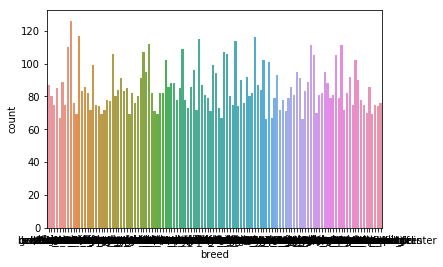

In [21]:
import seaborn as sns
sns.countplot(x='breed',data = df_labels)

The groups look balanced enough. We proceed to preprocessing the data. First we set the Y, or label data as one hot vectors.

In [74]:
from keras.utils import to_categorical
from numpy import array
breeds = df_labels['breed'].tolist()
breed = df_labels['breed'].unique()
breed_to_id = dict((j,i) for i,j in enumerate(breed))
id_list = to_categorical(list(breed_to_id.values()))
id_list

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

The Y part is done. Now off to preprocessing the images as X.

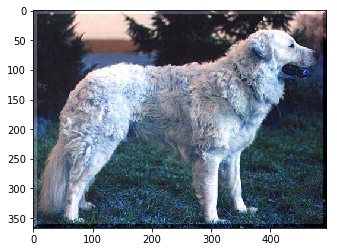

In [65]:
#Plotting a random image
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("../input/train/"+trainlist[0])
%matplotlib inline
imgplot = plt.imshow(image)

In [76]:
#storing all images in a variable X
X = []
Y = []
for i in range(len(trainlist)):
    image = cv2.imread("../input/train/"+trainlist[i])
    image = cv2.resize(image,(64,64), interpolation = cv2.INTER_CUBIC)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    X.append(image)
    #Y.append(breed_to_id[trainlist[i][0:len(trainlist[i])-4]])


(64, 64)